In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('Training_data_preprocessed.csv')
df['Text'] = df['Text'].astype('str')
df.head()

,Text,Category,EmailType,clean_text,tokens
0,"Hi *******, Your payment to Uber India was App...",category_3,email_type_93,hi payment uber india approved paid amount ube...,"['hi', 'payment', 'uber', 'india', 'approved',..."
1,Your Zomato Online Ordering receipt Refund Pro...,category_3,email_type_84,zomato online ordering receipt refund processe...,"['zomato', 'online', 'ordering', 'receipt', 'r..."
2,Electricity Bill Payment Successful ‚Çπ 979 Fo...,category_3,email_type_3,electricity bill payment successful ‚çπ 979 ce...,"['electricity', 'bill', 'payment', 'successful..."
3,Payment requested by FINCFRIENDS PVT. LTD. Rec...,category_3,email_type_92,payment requested fincfriends pvt ltd receipt ...,"['payment', 'requested', 'fincfriends', 'pvt',..."
4,Greetings from Swiggy Your order was delivered...,category_3,email_type_86,greeting swiggy order delivered 29 minute rate...,"['greeting', 'swiggy', 'order', 'delivered', '..."


In [4]:
# Basic information about the dataset
df.info()

# Summary statistics of the dataset
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35138 entries, 0 to 35137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       35138 non-null  object
 1   Category   35138 non-null  object
 2   EmailType  35138 non-null  object
dtypes: object(3)
memory usage: 823.7+ KB


,Text,Category,EmailType
count,35138,35138,35138
unique,32703,3,143
top,DOWNLOAD APP ORIGINAL PRODUCTS CASH ON DELIVER...,category_3,email_type_138
freq,115,29872,13079


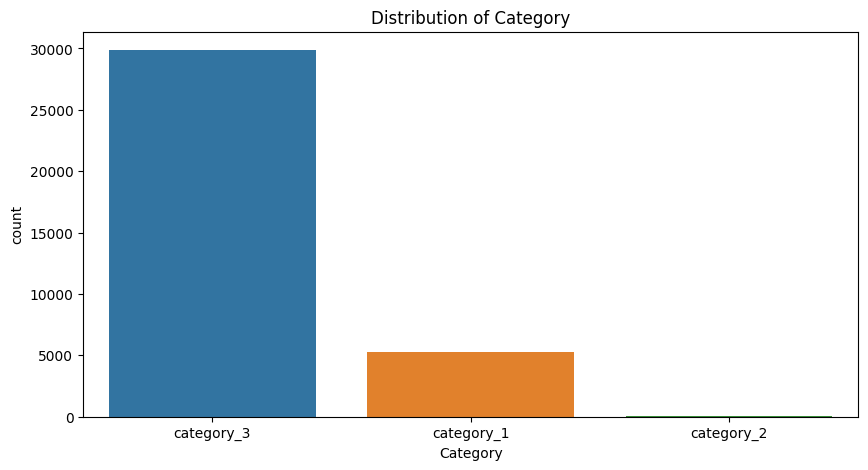

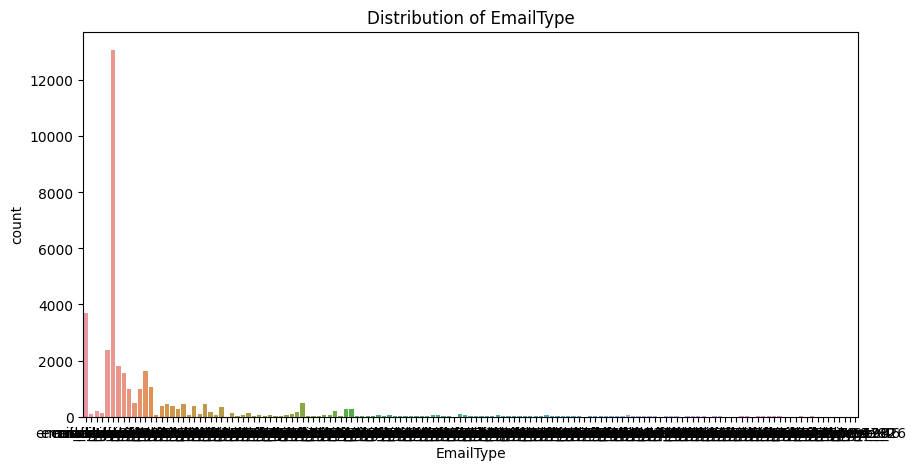

In [5]:

# Distribution of Category
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Category')
plt.show()

# Distribution of EmailType
plt.figure(figsize=(10, 5))
sns.countplot(x='EmailType', data=df)
plt.title('Distribution of EmailType')
plt.show()


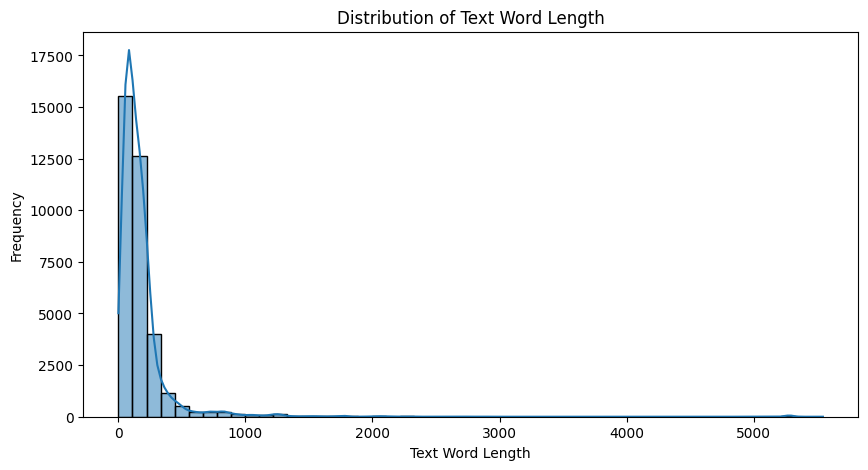

In [14]:
# Adding a new column for text Word length
df['TextWordLength'] = df['Text'].apply(lambda x: len(x.split(' ')))

# Plotting the distribution of text length
plt.figure(figsize=(10, 5))
sns.histplot(df['TextWordLength'], bins=50, kde=True)
plt.title('Distribution of Text Word Length')
plt.xlabel('Text Word Length')
plt.ylabel('Frequency')
plt.show()


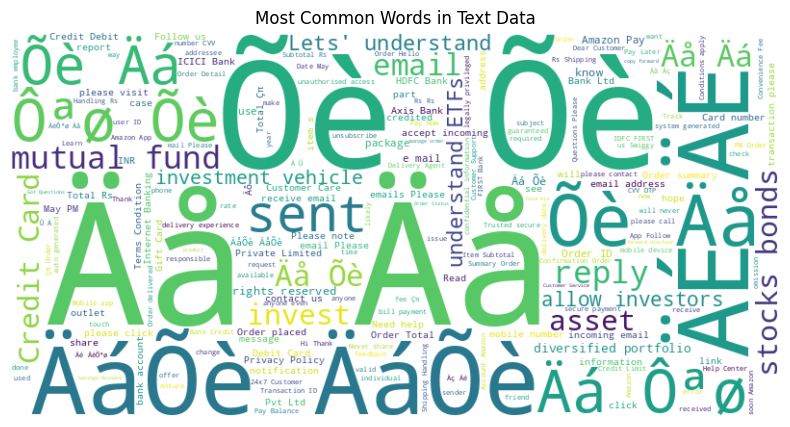

In [11]:
from wordcloud import WordCloud

# Combine all text data
text_combined = ' '.join(df['Text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text Data')
plt.show()


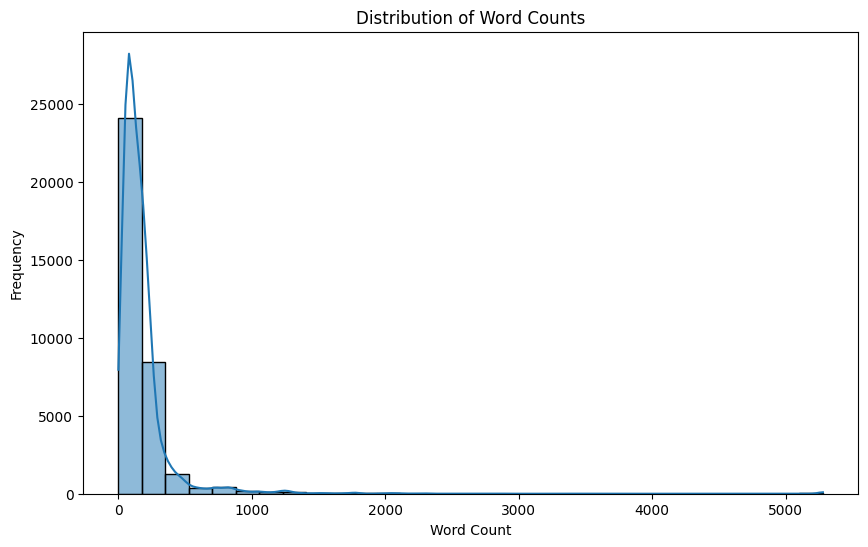

In [9]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

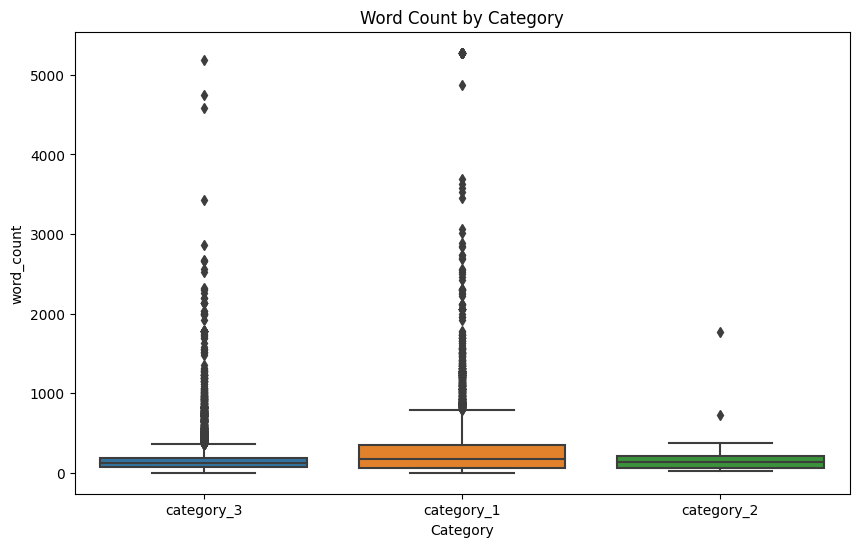

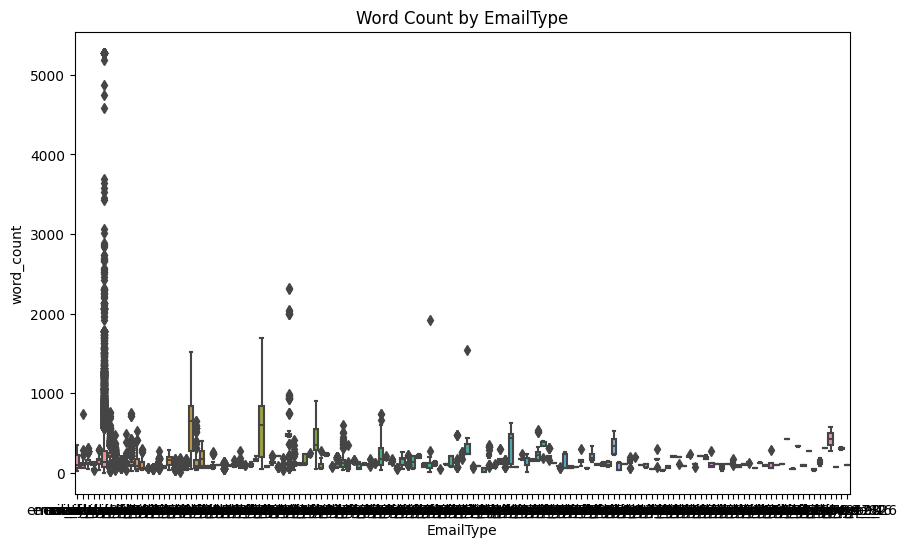

In [10]:
# Correlation between word count and Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='word_count', data=df)
plt.title('Word Count by Category')
plt.show()

# Correlation between word count and EmailType
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmailType', y='word_count', data=df)
plt.title('Word Count by EmailType')
plt.show()

Top 20 Bigrams: [('äå äå', 79185), ('õè õè', 65450), ('äáõè äáõè', 19267), ('äé äé', 17254), ('õè äå', 11354), ('õè äá', 11062), ('äá ôªø', 10562), ('ôªø õè', 10169), ('email please', 8831), ('credit card', 8312), ('may 2024', 7995), ('email sent', 7800), ('right reserved', 7142), ('mutual fund', 7090), ('please reply', 6395), ('order id', 6276), ('äá õè', 6268), ('fund investment', 6240), ('äå õè', 5862), ('investor invest', 5831)]
Top 20 Trigrams: [('äå äå äå', 78637), ('õè õè õè', 64890), ('äáõè äáõè äáõè', 19157), ('äé äé äé', 16165), ('äá ôªø õè', 10169), ('mutual fund investment', 6229), ('õè äá ôªø', 6002), ('ôªø õè äá', 6000), ('let understand etf', 5824), ('allow investor invest', 5824), ('understand etf mutual', 5822), ('portfolio stock bond', 5821), ('asset let understand', 5819), ('vehicle allow investor', 5819), ('stock bond asset', 5818), ('etf mutual fund', 5818), ('investment vehicle allow', 5818), ('investor invest diversified', 5818), ('äå õè äå', 5816), ('bond asset 

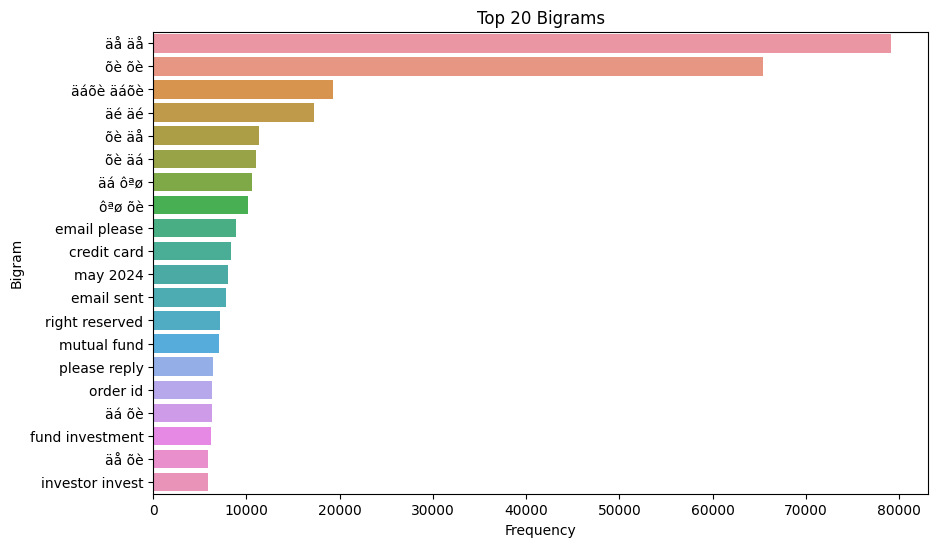

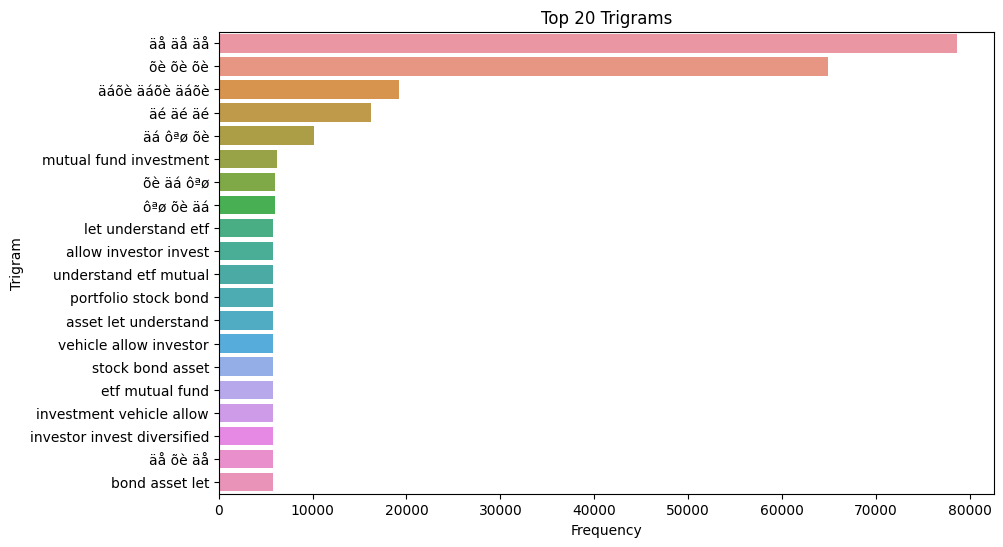

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, n=2, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Get top bigrams
top_bigrams = get_top_ngrams(df['clean_text'], n=2, top_k=20)
print("Top 20 Bigrams:", top_bigrams)

# Get top trigrams
top_trigrams = get_top_ngrams(df['clean_text'], n=3, top_k=20)
print("Top 20 Trigrams:", top_trigrams)

# Plot top bigrams
bigrams, counts = zip(*top_bigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(bigrams))
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

# Plot top trigrams
trigrams, counts = zip(*top_trigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(trigrams))
plt.title('Top 20 Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()


In [12]:
non_unique_texts = df['Text'][df['Text'].duplicated(keep=False)]

# Step 2: Filter the DataFrame to get rows with these non-unique values
df_non_unique = df[df['Text'].isin(non_unique_texts)]

,Text,Category,EmailType,TextLength
35,"Dear Customer, As per your request, the proces...",category_3,email_type_138,633
63,Stay on top of your investments with Groww. Se...,category_3,email_type_138,2027
75,Stay on top of your investments with Groww. Se...,category_3,email_type_138,2027
85,To continue using your Mutual Funds investment...,category_3,email_type_138,1075
117,Stay on top of your investments with Groww. Se...,category_3,email_type_138,2027


In [15]:
list(df[df['Category']=='category_2']['clean_text'])

['dear customer reference personal loan application kotak mahindra bank please click link confirm official email id click verify email warm regard team kotak mahindra bank',
 'ää hello ‚ää ‚ää simply drop u email call u ‚ää featured disclaimer share stock broker ltd arssbl amfiregistered mutual fund distributor amfi arn4478 mutual fund investment subject market risk read scheme related document carefully unsubscribe',
 'hi thank registering scaler session solid principle every developer must know event detail date time 9th may‚äô24 thursday 0730pm 1030pm instructor invite add calendar extra learning material note bonus update join whatsapp group join whatsapp group join visit event page post 0730pm day click join masterclass question contact u see team scaler click unsubscribe',
 'flying lounge access priority pas fabulous check see hour think may open 24 hour ‚ä¢ early morning flight want save day saty cost ‚ä¢ ukookyfudge4448 ucpolydoroff replied post rthailandtourism ¬∑ 2 ago rthail

In [17]:
value_counts = df['EmailType'].value_counts()
# Step 2: Filter value counts to get only those less than 10
filtered_counts = value_counts[value_counts < 100]
len(filtered_counts)

115

In [21]:
value_counts.median()

17.0

In [23]:
df['Category'].value_counts()


category_3    29872
category_1     5246
category_2       20
Name: Category, dtype: int64

In [24]:
df['Category'].value_counts().mean()

11712.666666666666

In [ ]:
Conclusion - 
1. Remove Null values on Text
2. Remove Duplicate Rows based on Text
3. Remove Stop Words
4. Remove Most occuring common words which are not part of classification decision making
3. It is a highly imbalanced dataset where for EmailType where label type count is <10 is 55 and <100 is 115 while mean value is 245, oversmapling cant be done using SMOTE as some samples were less than k_neighbours
4. It is a highly imbalanced dataset where for Category label type count category_2 has only 20 items while mean label type count is 11712.6
3. Balance DataSet using oversampling for minority class
4. Adjust Class Weights for giving more importance to minority class
5. BERT limitations - not able to handle more than 512 tokens, have to use bigger model